# Preprocessing medical imaging data using Python

### Helpers

In [2]:
import matplotlib.pyplot as plt

def show_slice(image):
    # Display the image using Matplotlib
    plt.imshow(image[:,:,0], cmap='gray')
    plt.title('Image')
    plt.show()

### CropForeground in 2D or 3D

In [117]:
from monai.transforms import CropForeground
import nibabel as nib
import numpy as np

#### In a 2D array

In [119]:
array_2D = [
    [[0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0]]]

#### In a 3D array

In [118]:
image = np.array(
    [
    [[0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0]],

    [[0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 1, 2, 1, 0, 0],
      [0, 0, 1, 3, 2, 0, 0],
      [0, 0, 1, 2, 1, 0, 0],
      [0, 0, 4, 2, 9, 0, 0],
      [0, 0, 0, 0, 0, 0, 0]],

    [[0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 1, 2, 1, 0, 0],
      [0, 0, 1, 3, 2, 0, 0],
      [0, 0, 1, 2, 1, 0, 0],
      [0, 0, 4, 2, 9, 0, 0],
      [0, 0, 0, 0, 0, 0, 0]],

    [[0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0]]
      ])  # 3x10x7



cropper = CropForeground(return_coords=True, margin=1, channel_indices=2)
crpped, Sxy, Exy = cropper(image)

print('Starting Point', Sxy)
print('End Point', Exy)

Starting Point [4 1]
End Point [10  6]


#### In a 3D Nifti file

In [108]:
nifti_file = nib.load('data/patient1_before.nii.gz')
np_array = nifti_file.get_fdata()

(512, 512, 68)

In [114]:
crop_roi = CropForeground(return_coords=True, margin=0)
cropped_roi, xy1, xy2 = crop_roi(np_array)

print('Old Shape:', np_array.shape)
print('New Shape:', cropped_roi.shape)
print('Starting Point', xy1)
print('End Point', xy2)

torch.Size([512, 333, 68])

--------------------------------------------

### Change image orientation

In [2]:
from monai.transforms import Orientation
import nibabel as nib
import matplotlib.pyplot as plt

In [10]:
orientation_changer = Orientation(axcodes='RAS')
image = nib.load('data/patient1_before.nii.gz').get_fdata()
oriented_image = orientation_changer(image)

axcodes ('RAS') length is smaller than number of input spatial dimensions D=2.
Orientation: spatial shape = (512, 68), channels = 512,please make sure the input is in the channel-first format.


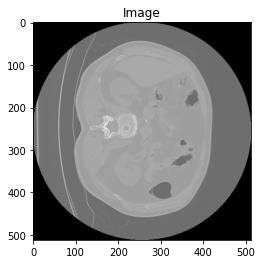

In [11]:
# Display the image using Matplotlib
plt.imshow(image[:,:,0], cmap='gray')
plt.title('Image')
plt.show()

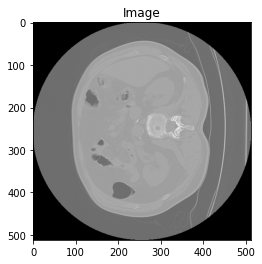

In [8]:
# Display the image using Matplotlib
plt.imshow(oriented_image[:,:,0], cmap='gray')
plt.title('Image')
plt.show()

------------------------------------------------------------

### Scale the intensity

In [11]:
from monai.transforms import ScaleIntensity, ScaleIntensityRange 
import nibabel as nib
import numpy as np

In [8]:
array = nib.load('data/patient1_before.nii.gz').get_fdata()
intensity_scaler = ScaleIntensity(minv=0, maxv=1)

sclaed_array = intensity_scaler(array)

In [14]:
print(np.min(array))
print(np.min(sclaed_array))

print(np.max(array))
print(np.max(sclaed_array))

-3024.0
0.0
3071.0
1.0


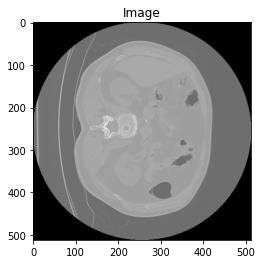

In [15]:
show_slice(array)

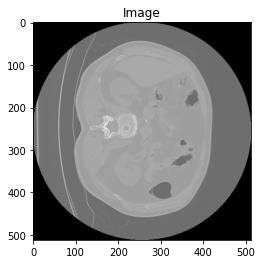

In [16]:
show_slice(sclaed_array)

#### Scaled Intensity Ranged (can control the visualization)

In [27]:
ranged_intensity_scaler = ScaleIntensityRange(a_min=-200, a_max=200, b_min=0.0, b_max=1.0, clip=True)

ranged_scaled_array = ranged_intensity_scaler(array)

In [28]:
print(np.min(ranged_scaled_array))
print(np.max(ranged_scaled_array))

0.0
1.0


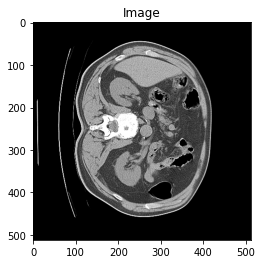

In [29]:
show_slice(ranged_scaled_array)